# Import Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import collections
import operator
from PIL import Image
import imageio

# Get Train & Test Set

In [4]:
train_directory = '../simpsons_train_scaled'

classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))

class_dict = dict(zip(classes, class_indices))
class_dict, len(class_dict)

({'abraham_grampa_simpson': 6,
  'agnes_skinner': 2,
  'apu_nahasapeemapetilon': 43,
  'barney_gumble': 18,
  'bart_simpson': 28,
  'bumblebee_man': 1,
  'carl_carlson': 23,
  'charles_montgomery_burns': 29,
  'chief_wiggum': 36,
  'cletus_spuckler': 16,
  'comic_book_guy': 8,
  'disco_stu': 31,
  'edna_krabappel': 34,
  'fat_tony': 33,
  'gil': 22,
  'groundskeeper_willie': 10,
  'hans_moleman': 38,
  'helen_lovejoy': 7,
  'homer_simpson': 11,
  'jasper_beardly': 41,
  'jimbo_jones': 5,
  'kent_brockman': 40,
  'krusty_the_clown': 4,
  'lenny_leonard': 24,
  'lionel_hutz': 45,
  'lisa_simpson': 19,
  'maggie_simpson': 17,
  'marge_simpson': 20,
  'martin_prince': 25,
  'mayor_quimby': 39,
  'milhouse_van_houten': 14,
  'miss_hoover': 15,
  'moe_szyslak': 0,
  'ned_flanders': 30,
  'nelson_muntz': 13,
  'otto_mann': 21,
  'patty_bouvier': 12,
  'principal_skinner': 27,
  'professor_john_frink': 37,
  'rainier_wolfcastle': 35,
  'ralph_wiggum': 46,
  'selma_bouvier': 42,
  'sideshow_bob

In [5]:
# Not needed in AWS as images were scaled locally

# # Loop over each folder of train directory and read pictures, storing pixel matrix, character-name, and label id
# main = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg'
# train_scaled = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled/'


# def resizeTrainImages():
#     for item in classes:
#         dirToRead = train_directory + '/' + item
#         dirToSave = train_scaled + item
        
#         if(os.path.exists(dirToSave)):
#             print('Directory already exists')
#         else:
# #             print('No dir')
#             os.makedirs(train_scaled + item)
        
#         pics = os.listdir(dirToRead)
#         for pic in pics:
#             if(pic != '.DS_Store'):
#                 fullPathRead = dirToRead + '/' + pic
#                 fullPathSave = dirToSave + '/' + pic
#                 if(os.path.exists(fullPathSave)):
#                     print("File Exists")
#                 else:
#                     im = Image.open(fullPathRead)
#                     imResize = im.resize((24,24), Image.ANTIALIAS)
#                     imResize.save(fullPathSave, 'JPEG', quality=90)
# resizeTrainImages()


In [6]:
trainObj = []

for dirs in classes:
    directory = train_directory + '/' + dirs + '/'
    pics = os.listdir(directory)
    for pic in pics:
        path = directory + pic
        pix = imageio.imread(path)
        trainObj.append([pix, dirs, class_dict[dirs]])
        
trainObj = np.array(trainObj)
trainObj.shape, trainObj[0][0].shape

((20933, 3), (100, 100, 3))

In [7]:
# Not needed for AWS as images were scaled locally

# # Resize all test images and place in folder
# test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset'
# test_scaled = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

# def resizeTestImages():        
#         pics = os.listdir(test_directory)
#         for pic in pics:
#             if(pic != '.DS_Store'):
#                 fullPathRead = test_directory + '/' + pic
#                 fullPathSave = test_scaled + '/' + pic
#                 if(os.path.exists(fullPathSave)):
#                     print("File Exists")
#                 else:
#                     im = Image.open(fullPathRead)
#                     imResize = im.resize((24,24), Image.ANTIALIAS)
#                     imResize.save(fullPathSave, 'JPEG', quality=90)
# resizeTestImages()

In [8]:
# Get all test images into a similar format given the one directory they are all in
test_directory = '../simpsons_test_scaled'
test_pics = os.listdir(test_directory)
ids = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_directory + '/' + pic
        pix_array = imageio.imread(path)
        character_label = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        ids.append([pix_array, character_label, class_dict[character_label]])
testObj = np.array(ids)
testObj.shape, testObj[0][0].shape

((990, 3), (100, 100, 3))

# Print out the first 10 pics

/home/gclark/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


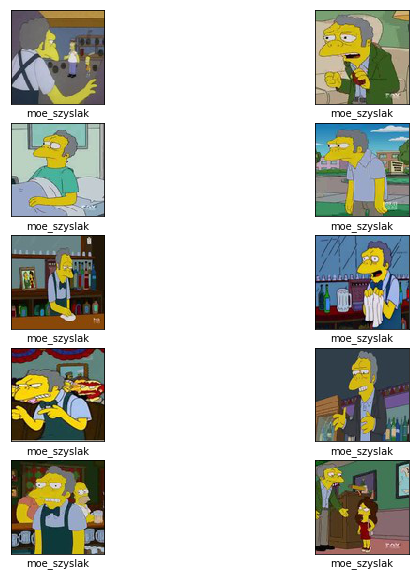

In [9]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainObj[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainObj[i][0], cmap=plt.cm.binary)
    plt.xlabel(trainObj[i][1])

# PreProcess and convert 0-255 RGB to 0-1 range

In [16]:
def preProcess(obj):
    for i in range(len(obj)):
        obj[i][0] = obj[i][0]/255

preProcess(trainObj)
preProcess(testObj)

trainObj.shape, testObj.shape


Image([[ 69,  63,  77],
       [ 71,  65,  79],
       [ 74,  66,  81],
       [ 76,  68,  83],
       [ 76,  68,  83],
       [ 76,  68,  81],
       [ 76,  68,  81],
       [ 76,  68,  81],
       [ 77,  69,  82],
       [ 78,  70,  83],
       [ 78,  72,  84],
       [ 78,  72,  84],
       [ 75,  72,  83],
       [ 75,  71,  85],
       [ 76,  72,  86],
       [ 76,  74,  87],
       [ 81,  67,  90],
       [ 81,  69,  89],
       [ 80,  72,  87],
       [ 80,  74,  86],
       [ 77,  74,  85],
       [ 76,  73,  84],
       [ 76,  72,  86],
       [ 76,  72,  89],
       [ 78,  69,  88],
       [ 81,  68,  86],
       [ 91,  75,  88],
       [ 91,  71,  73],
       [ 94,  70,  60],
       [126, 100,  77],
       [154, 125,  93],
       [146, 117,  77],
       [159, 126,  31],
       [163, 127,  43],
       [159, 119,  50],
       [161, 116,  61],
       [171, 123,  75],
       [168, 121,  69],
       [160, 116,  53],
       [161, 123,  48],
       [160, 125,  41],
       [158, 128

In [9]:
def imagesOrLabels(data, index):
    vec = list(map(lambda x: x[index], data))
    vec = np.array(vec)
    return(vec)

    
train_images = imagesOrLabels(trainObj, 0)
train_labels = imagesOrLabels(trainObj, 2)

test_images = imagesOrLabels(testObj, 0)
test_labels = imagesOrLabels(testObj, 2)


train_images.shape, test_images.shape

((20933, 24, 24, 3), (990, 24, 24, 3))

# Model Construction

## Model Layers

In [10]:
model_classes = len(class_dict)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(24, 24, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(model_classes, activation=tf.nn.softmax)
])

## Model Functions (optimizer, accuracy)

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit Model

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
20933/20933 [==============================] - 5s 219us/step - loss: 2.7439 - acc: 0.2443
Epoch 2/5
20933/20933 [==============================] - 4s 209us/step - loss: 2.4334 - acc: 0.3356
Epoch 3/5
20933/20933 [==============================] - 4s 209us/step - loss: 2.3238 - acc: 0.3666
Epoch 4/5
20933/20933 [==============================] - 4s 210us/step - loss: 2.2553 - acc: 0.3822
Epoch 5/5
20933/20933 [==============================] - 4s 215us/step - loss: 2.1970 - acc: 0.3953


# Evaluate Accuracy w/ Test Set

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

990/990 [==============================] - 0s 156us/step
Test accuracy: 0.40909090927152925
